In [ ]:
import pandas as pd
import numpy as np
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [ ]:
import sklearn
print(sklearn.__version__)


1.6.1


# Data Preprocessing

In [ ]:
import joblib
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    tokens = word_tokenize(text)
    lemmatized = [lemmatizer.lemmatize(token.lower()) for token in tokens]
    return ' '.join(lemmatized)


[nltk_data] Downloading package punkt to C:\Users\afrah
[nltk_data]     khan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\afrah
[nltk_data]     khan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\afrah
[nltk_data]     khan\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
df=pd.read_csv(r"C:\Users\afrah khan\priority\supportTicketData.csv")

In [ ]:
df.sample(5)

,TicketID,Ticket detailed description,urgency-Priority
2854,126310,inca la sa la cum la moment tot si sa sa ca en...,P2
3630,127086,help with error hi please raise ticket for bel...,P1
7748,131204,when boots up monitor laptop becomes or mixes ...,P1
14022,137478,suspicious received hi received suspicious whi...,P3
7818,131274,sent tuesday re issues hello if anything done ...,P2


In [ ]:
df.columns = ['TicketID', 'Description', 'Priority']

In [ ]:
print("Priority Distribution:\n", df['Priority'].value_counts())

Priority Distribution:
 Priority
P3    7520
P1    6748
P2    5528
Name: count, dtype: int64


# EDA

C:\Users\afrah khan\AppData\Local\Temp\ipykernel_4312\3268130302.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Priority'], palette='coolwarm')


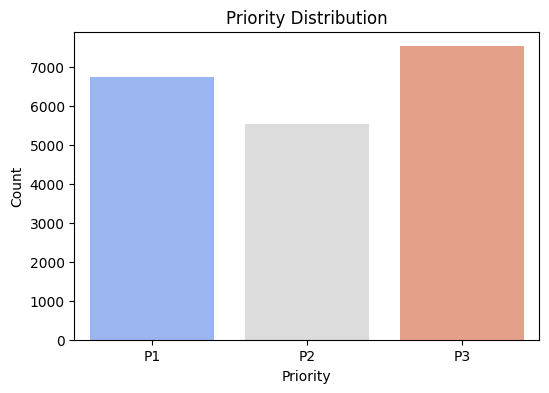

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df['Priority'], palette='coolwarm')
plt.title("Priority Distribution")
plt.xlabel("Priority")
plt.ylabel("Count")
plt.show()

In [ ]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


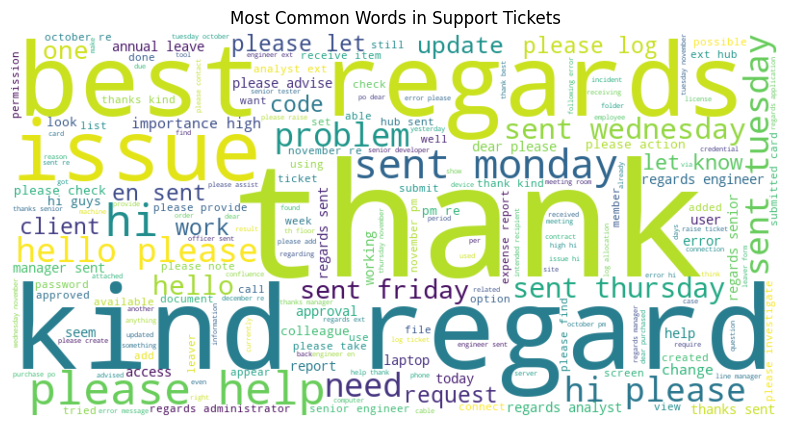

In [ ]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['Description']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Common Words in Support Tickets")
plt.show()

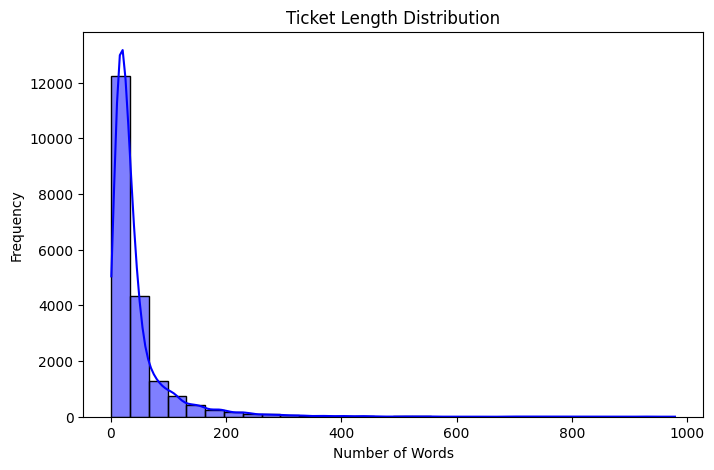

In [ ]:
df['Text_Length'] = df['Description'].apply(lambda x: len(x.split()))
plt.figure(figsize=(8, 5))
sns.histplot(df['Text_Length'], bins=30, kde=True, color='blue')
plt.title("Ticket Length Distribution")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

C:\Users\afrah khan\AppData\Local\Temp\ipykernel_4312\1928073790.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Priority'], y=df['Text_Length'], palette='coolwarm')


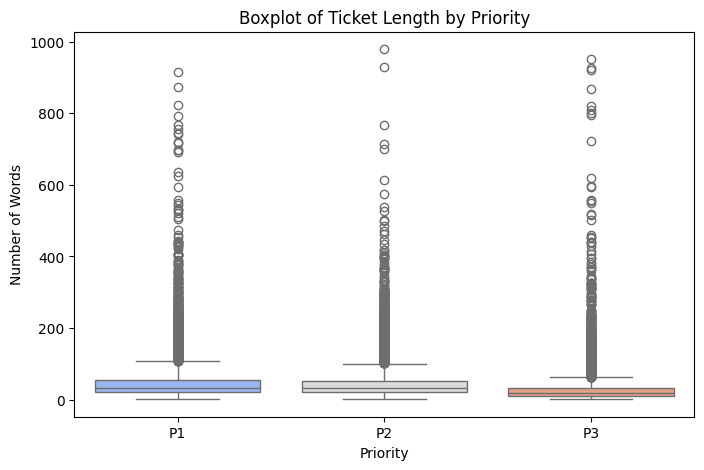

In [ ]:
# Boxplot of Text Length by Priority
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Priority'], y=df['Text_Length'], palette='coolwarm')
plt.title("Boxplot of Ticket Length by Priority")
plt.xlabel("Priority")
plt.ylabel("Number of Words")
plt.show()

# Feature Engineering

In [ ]:
df=df.drop("TicketID",axis=1)
df.sample(5)

,Description,Priority,Text_Length
6556,sent thursday linked via hi have recently uplo...,P2,36
16377,certificates hi ask issue stated by thank tues...,P3,187
19175,cards badge merge floor please help la si,P3,8
8048,hello se va pare sa fie sa sa ne log care se p...,P2,22
12333,hi cannot please best regards specialist reten...,P3,64


In [ ]:
priority_mapping = {'P1': 0, 'P2': 1, 'P3': 2}
df['Priority'] = df['Priority'].map(priority_mapping)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    df['Description'], df['Priority'], test_size=0.2, random_state=42, stratify=df['Priority'])

In [ ]:


nltk.download('stopwords')


 


[nltk_data] Downloading package stopwords to C:\Users\afrah
[nltk_data]     khan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
vectorizer = TfidfVectorizer(max_features=5000,stop_words='english',preprocessor=lemmatize_text)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


c:\Users\afrah khan\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\feature_extraction\text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'wa'] not in stop_words.
  warnings.warn(


# Models

In [ ]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Naive Bayes': MultinomialNB(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Training & Evaluating Models



In [ ]:
best_model = None
best_accuracy = 0
for name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    acc = accuracy_score(y_test, y_pred)
    print(f"\nModel: {name}")
    print("Accuracy:", acc)
    print("Classification Report:\n", classification_report(y_test, y_pred))
    
    if acc > best_accuracy:
        best_accuracy = acc
        best_model = model


Model: Logistic Regression
Accuracy: 0.7553030303030303
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.73      0.69      1350
           1       0.61      0.48      0.54      1106
           2       0.93      0.99      0.96      1504

    accuracy                           0.76      3960
   macro avg       0.73      0.73      0.73      3960
weighted avg       0.75      0.76      0.75      3960


Model: Random Forest
Accuracy: 0.7545454545454545
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.83      0.72      1350
           1       0.64      0.36      0.46      1106
           2       0.95      0.98      0.96      1504

    accuracy                           0.75      3960
   macro avg       0.74      0.72      0.71      3960
weighted avg       0.75      0.75      0.74      3960


Model: Naive Bayes
Accuracy: 0.7217171717171718
Classification Report:
          

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
import joblib
import re

# --- Clean text ---
def simple_preprocess(text):
    text = text.lower()
    text = re.sub(r'\W+', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# --- Sample training data (replace with your real dataset) ---
X = [
    "My email isn't working",
    "Server is down!!!",
    "Forgot password",
    "Application crashes on launch",
    "Need help setting up VPN"
]
y = ["Low", "High", "Medium", "High", "Low"]

X_clean = [simple_preprocess(text) for text in X]

# --- Train model ---
vectorizer = TfidfVectorizer()
X_vect = vectorizer.fit_transform(X_clean)

model = LogisticRegression()
model.fit(X_vect, y)

# --- Save clean model/vectorizer ---
joblib.dump(model, "best_support_ticket_model_compressed.pkl")
joblib.dump(vectorizer, "tfidf_vectorizer_compressed.pkl")


Making Predictions

In [ ]:
def predict_priority(ticket_text):
    """ Predicts the priority of a given support ticket."""
    text_tfidf = vectorizer.transform([ticket_text])  
    predicted_priority = best_model.predict(text_tfidf)  
    priority_label = {0: 'P1', 1: 'P2', 2: 'P3'}.get(predicted_priority[0])  
    return priority_label

new_ticket = "System is completely down, unable to process transactions."
print("Predicted Priority:", predict_priority(new_ticket))


Predicted Priority: P1


In [ ]:
import joblib

def load_model_and_vectorizer():
    model = joblib.load('best_support_ticket_model_compressed.pkl')
    vectorizer = joblib.load('tfidf_vectorizer_compressed.pkl')
    return model, vectorizer


joblib.dump(model, "best_support_ticket_model_compressed.pkl", compress=3)
joblib.dump(vectorizer, "tfidf_vectorizer_compressed.pkl", compress=3)


['tfidf_vectorizer_compressed.pkl']